In [ ]:
!pip install mimesis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.5 MB/s eta 0:00:00


In [ ]:
pip install --upgrade mimesis

In [ ]:
pip install --upgrade mimesis

In [ ]:
from mimesis import Finance
from mimesis.enums import Locale

finance = Finance(locale=Locale.EN)

# Get all attributes using dir()
attributes = dir(finance)

# Print the attributes
for attribute in attributes:
    print(attribute)

Meta
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_dataset
_extract
_has_seed
_load_dataset
_override_locale
_read_global_file
_setup_locale
_update_dict
bank
company
company_type
cryptocurrency_iso_code
cryptocurrency_symbol
currency_iso_code
currency_symbol
get_current_locale
locale
override_locale
price
price_in_btc
random
reseed
seed
stock_exchange
stock_name
stock_ticker
update_dataset
validate_enum


In [ ]:
from mimesis import Person, Address, Finance, Datetime
from mimesis.enums import Locale
import pandas as pd
import numpy as np

# Number of customers
num_customers = 1000

# Initialize Mimesis providers with Indian locale
person = Person(locale=Locale.EN)
address = Address(locale=Locale.EN)
finance = Finance(locale=Locale.EN)
dt = Datetime(locale=Locale.EN)

# Generate customer profiles
customer_profiles = []
for i in range(num_customers):
    customer_id = i + 1  # Consistent customer IDs
    profile = {
        'customer_id': customer_id,
        'first_name': person.first_name(),
        'last_name': person.last_name(),
        'gender': person.gender(),
        'birthdate': dt.date(start=1970, end=2000), # Realistic age range
        'address': address.address(),
        'city': address.city(),
        'state': address.state(),
        'zip_code': address.postal_code(),
        'phone_number': person.phone_number(),
        'email': person.email(),
        'occupation': person.occupation(),
        'annual_income': np.random.randint(200000, 2000000 + 1),  # Income range

    }
    customer_profiles.append(profile)

customer_df = pd.DataFrame(customer_profiles)

# Generate transaction history
num_transactions = 5000  # Example number of transactions

transaction_history = []
for _ in range(num_transactions):
    customer_id = np.random.choice(customer_df['customer_id']) # Choose from existing IDs
    transaction_date = dt.datetime(start=2022, end=2024) # Realistic time frame
    transaction_amount = finance.price(start=100, end=10000) # Transaction amounts
    transaction_type = np.random.choice(['deposit', 'withdrawal', 'payment'])

    # Add some randomness to transaction descriptions to make it more realistic
    transaction_description = ""
    if transaction_type == 'deposit':
        transaction_description = np.random.choice(['Salary Deposit','Cash Deposit','Check Deposit'])
    elif transaction_type == 'withdrawal':
        transaction_description = np.random.choice(['ATM Withdrawal','Online Transfer','Bill Payment'])
    else: #payment
        transaction_description = np.random.choice(['Online Purchase','Restaurant Bill','Grocery Shopping'])


    transaction = {
        'customer_id': customer_id,
        'transaction_date': transaction_date,
        'transaction_amount': transaction_amount,
        'transaction_type': transaction_type,
        'transaction_description': transaction_description
    }
    transaction_history.append(transaction)

transaction_df = pd.DataFrame(transaction_history)


# Convert date columns to datetime objects
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'])
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

# Save to CSV files (or other formats as needed)
customer_df.to_csv('customer_profiles.csv', index=False)
transaction_df.to_csv('transaction_history.csv', index=False)

print("Customer profiles and transaction history generated and saved to CSV files.")
print("Customer Profile Sample:\n",customer_df.head())
print("Transaction History Sample:\n",transaction_df.head())

AttributeError: 'Finance' object has no attribute 'amount'

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import pandas as pd
import numpy as np

fake = Faker('en_IN')  # Or 'hi_IN' for Hindi

num_customers = 1000

customer_profiles = []
for i in range(num_customers):
    customer_id = i + 1
    profile = {
        'customer_id': customer_id,
        'first_name': fake.first_name(),
        'last_name': fake.last_name(),
        'gender': fake.random_element(['Male', 'Female']),
        'birthdate': fake.date_between(start_date='-50y', end_date='-20y'),
        'address': fake.street_address(),
        'city': fake.city(),
        'state': fake.state(),
        'zip_code': fake.postcode(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'occupation': fake.job(),
        'annual_income': fake.random_int(min=200000, max=2000000),
        'account_number': fake.iban(),
        'card_number': fake.credit_card_number(),
    }
    customer_profiles.append(profile)

customer_df = pd.DataFrame(customer_profiles)

# Generate transaction history (Variable number of transactions per customer)
transaction_history = []
for customer_id in customer_df['customer_id']:
    num_transactions = np.random.randint(0, 10)  # Random number of transactions (0 to 9)
    for _ in range(num_transactions):
        transaction_date = fake.date_time_between(start_date='-2y', end_date='now')
        transaction_amount = fake.random_int(min=100, max=10000)
        transaction_type = np.random.choice(['deposit', 'withdrawal', 'payment'])

        transaction_description = ""
        if transaction_type == 'deposit':
            transaction_description = np.random.choice(['Salary Deposit','Cash Deposit','Check Deposit'])
        elif transaction_type == 'withdrawal':
            transaction_description = np.random.choice(['ATM Withdrawal','Online Transfer','Bill Payment'])
        else: #payment
            transaction_description = np.random.choice(['Online Purchase','Restaurant Bill','Grocery Shopping'])


        transaction = {
            'customer_id': customer_id,
            'transaction_date': transaction_date,
            'transaction_amount': transaction_amount,
            'transaction_type': transaction_type,
            'transaction_description': transaction_description
        }
        transaction_history.append(transaction)

transaction_df = pd.DataFrame(transaction_history)

# Convert date columns to datetime objects
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'])
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

# Save to CSV files
customer_df.to_csv('customer_profiles.csv', index=False)
transaction_df.to_csv('transaction_history.csv', index=False)

print("Customer profiles and transaction history generated and saved to CSV files.")
print("Customer Profile Sample:\n", customer_df.head())
print("Transaction History Sample:\n", transaction_df.head())

Customer profiles and transaction history generated and saved to CSV files.
Customer Profile Sample:
    customer_id first_name last_name  gender  birthdate                address  \
0            1   Shivansh     Golla  Female 1975-10-07   18/67\nMangal Street   
1            2    Chasmum     Singh  Female 2000-02-15      008, Dhillon Road   
2            3      Ayaan     Setty    Male 1977-12-26    61, Sundaram Circle   
3            4       Jack      Kaur    Male 1984-12-07   961\nBhandari Circle   
4            5    Bhavika    Munshi  Female 1988-08-06  46/040\nChokshi Chowk   

           city             state zip_code phone_number  \
0      Mirzapur           Mizoram   667778   6247408141   
1  North Dumdum               Goa   203919  01847433882   
2        Ambala    Madhya Pradesh   799020  06132418736   
3       Asansol           Tripura   700665  05765901966   
4        Rampur  Himachal Pradesh   400624  09013591058   

                         email                    occupa

In [ ]:
import pandas as pd
import numpy as np

# Load your data
df_customers = pd.read_csv("customer_profiles.csv")
df_transactions = pd.read_csv("transaction_history.csv")

# 1. Data Cleaning and Preprocessing

# Convert date columns to datetime objects
df_customers['birthdate'] = pd.to_datetime(df_customers['birthdate'])
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])

# Handle Missing Values (Example: filling with a reasonable default)
df_customers['occupation'].fillna('Unknown', inplace=True)  # Or another appropriate value
df_customers['annual_income'].fillna(df_customers['annual_income'].median(), inplace=True) # Median imputation for income
df_transactions.dropna(inplace=True) #Drop rows with missing values.

# 2. Feature Engineering (Customer-Level Aggregation)

# Aggregate transaction data
df_customer_transactions = df_transactions.groupby('customer_id').agg(
    total_transactions=('transaction_amount', 'count'),  # Number of transactions
    total_amount_spent=('transaction_amount', 'sum'),  # Total amount spent
    average_transaction_amount=('transaction_amount', 'mean'), # Average transaction amount
    max_transaction_amount=('transaction_amount', 'max'),  # Largest transaction
    unique_transaction_descriptions = ('transaction_description', 'nunique'), #Number of unique descriptions
    days_since_first_transaction = ('transaction_date', lambda x: (x.max() - x.min()).days if len(x) > 0 else 0), #Days since first transaction
    transaction_frequency = ('transaction_date', lambda x: len(x) / (x.max() - x.min()).days if len(x) > 0 and (x.max() - x.min()).days > 0 else 0) # Transactions per day

).reset_index()

# 3. Merge Customer Profiles and Aggregated Transactions

df_customer_profiles = pd.merge(df_customers, df_customer_transactions, on='customer_id', how='left')

# 4. More Feature Engineering (After the Merge)

# Example: Calculate transaction amount as a percentage of annual income
df_customer_profiles['transaction_amount_to_income_ratio'] = (
    df_customer_profiles['total_amount_spent'] / df_customer_profiles['annual_income']
)

# Example: Calculate age from birthdate
df_customer_profiles['age'] = (pd.to_datetime('today') - df_customer_profiles['birthdate']).dt.days // 365.25 #Accounting for leap years


# 5. Handle Missing Values After the Merge
#After merging, you'll have missing values where a customer has no transactions.
#Fill these with 0 or another appropriate value.
df_customer_profiles.fillna(0, inplace=True) #Fill NaN with 0

#Now df_customer_profiles is ready for model training
print(df_customer_profiles.head())
df_customer_profiles.to_csv("customer_features.csv", index = False)

<ipython-input-3-ffef126d8dc6>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['occupation'].fillna('Unknown', inplace=True)  # Or another appropriate value
<ipython-input-3-ffef126d8dc6>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

   customer_id first_name last_name  gender  birthdate                address  \
0            1   Shivansh     Golla  Female 1975-10-07   18/67\nMangal Street   
1            2    Chasmum     Singh  Female 2000-02-15      008, Dhillon Road   
2            3      Ayaan     Setty    Male 1977-12-26    61, Sundaram Circle   
3            4       Jack      Kaur    Male 1984-12-07   961\nBhandari Circle   
4            5    Bhavika    Munshi  Female 1988-08-06  46/040\nChokshi Chowk   

           city             state  zip_code  phone_number  ...  \
0      Mirzapur           Mizoram    667778    6247408141  ...   
1  North Dumdum               Goa    203919    1847433882  ...   
2        Ambala    Madhya Pradesh    799020    6132418736  ...   
3       Asansol           Tripura    700665    5765901966  ...   
4        Rampur  Himachal Pradesh    400624    9013591058  ...   

        card_number total_transactions  total_amount_spent  \
0      675904989372                7.0             251

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "customer_features.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Select relevant features for clustering
features = [
    "total_transactions",
    "total_amount_spent",
    "average_transaction_amount",
    "max_transaction_amount",
    "unique_transaction_descriptions",
    "transaction_frequency",
    "transaction_amount_to_income_ratio"
]

# Drop rows with missing values (if any)
df_cleaned = df.dropna(subset=features).copy()

# Standardize features for better clustering performance
scaler = StandardScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["cluster"] = kmeans.fit_predict(df_cleaned_scaled)

# Analyze cluster properties
cluster_means = df_cleaned.groupby("cluster")[features].mean()

# Calculate composite risk with equal weights for all features
cluster_means['composite_risk'] = cluster_means[features].mean(axis=1)

# Sort clusters based on the composite risk score
sorted_clusters = cluster_means['composite_risk'].sort_values().index

# Map clusters to risk scores (Low = 0, Medium = 1, High = 2)
risk_mapping = {sorted_clusters[0]: 0, sorted_clusters[1]: 1, sorted_clusters[2]: 2}
df_cleaned["risk_score"] = df_cleaned["cluster"].map(risk_mapping)

# Drop the temporary cluster column
df_cleaned.drop(columns=["cluster"], inplace=True)

# Save the labeled dataset
labeled_file_path = "customer_features_labeled.csv"
df_cleaned.to_csv(labeled_file_path, index=False)

print(f"Labeled dataset saved as: {labeled_file_path}")


Labeled dataset saved as: customer_features_labeled.csv


In [ ]:
# # Add handling for unseen values in training data before clustering
# # Group less frequent categories or unseen values into "rare"
# def handle_rare_categories(df, feature, threshold=0.05):
#     """Groups categories with frequency below threshold into a "rare" category."""
#     value_counts = df[feature].value_counts(normalize=True)
#     rare_categories = value_counts[value_counts < threshold].index
#     df[feature] = df[feature].apply(lambda x: 'rare' if x in rare_categories else x)
#     return df

# # Get categorical columns
# categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# # Apply to categorical columns
# for col in categorical_columns:
#     df_cleaned = handle_rare_categories(df_cleaned, col)

<ipython-input-5-897266f92d2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["risk_score"], palette="coolwarm")


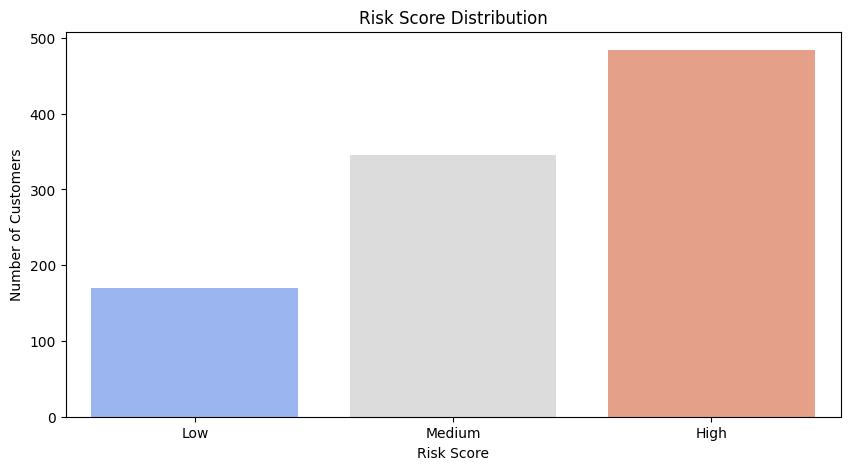

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot before balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=df_cleaned["risk_score"], palette="coolwarm")
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Number of Customers")
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["risk_score"])
y = df_cleaned["risk_score"]

print(X.dtypes)

from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical
categorical_columns = X.select_dtypes(include=['object']).columns

label_encoders = {}  # Store encoders for later use
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode categorical values
    label_encoders[col] = le  # Store encoder for inverse transformation if needed
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_smote_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_smote_balanced["risk_score"] = y_resampled

# Save the balanced dataset
df_smote_balanced.to_csv("customer_features_smote_balanced.csv", index=False)

# Display new distribution
print(df_smote_balanced["risk_score"].value_counts())


customer_id                             int64
first_name                             object
last_name                              object
gender                                 object
birthdate                              object
address                                object
city                                   object
state                                  object
zip_code                                int64
phone_number                            int64
email                                  object
occupation                             object
annual_income                           int64
account_number                         object
card_number                             int64
total_transactions                    float64
total_amount_spent                    float64
average_transaction_amount            float64
max_transaction_amount                float64
unique_transaction_descriptions       float64
days_since_first_transaction          float64
transaction_frequency             

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (replace 'customer_features_smote_balanced.csv' if needed)
df = pd.read_csv('customer_features_smote_balanced.csv')

# Define the features to use
selected_features = [
    "annual_income",
    "total_transactions",
    "total_amount_spent",
    "average_transaction_amount",
    "max_transaction_amount",
    "unique_transaction_descriptions",
    "days_since_first_transaction",
    "transaction_frequency",
    "transaction_amount_to_income_ratio",
    "age"
]

# Separate features (X) and target (y)
X = df[selected_features]
y = df["risk_score"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.979381443298969
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.96      0.98      0.97        87
           2       0.99      0.97      0.98       102

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



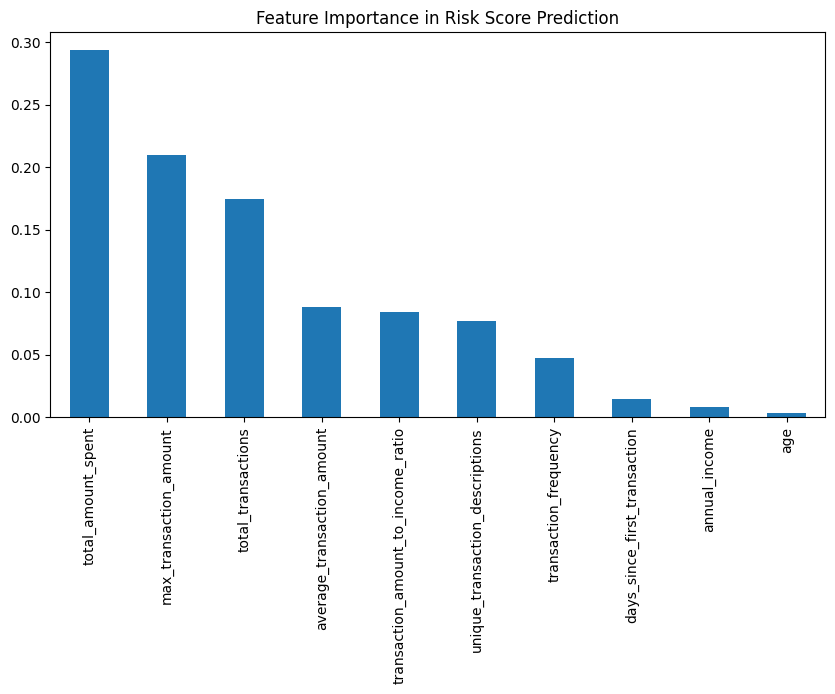

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance in Risk Score Prediction")
plt.show()


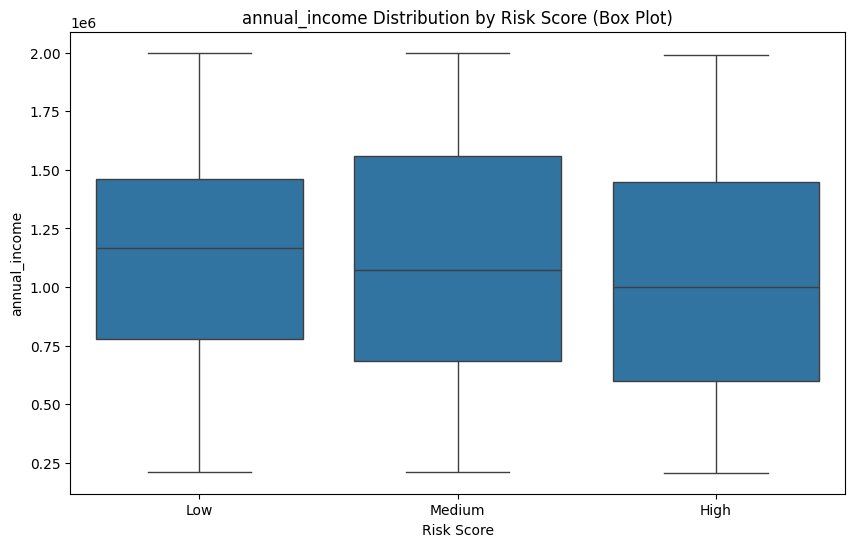

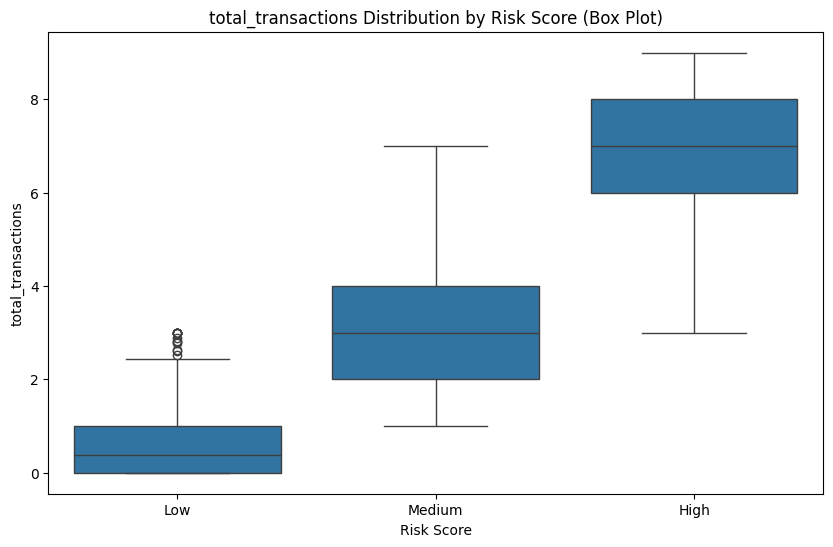

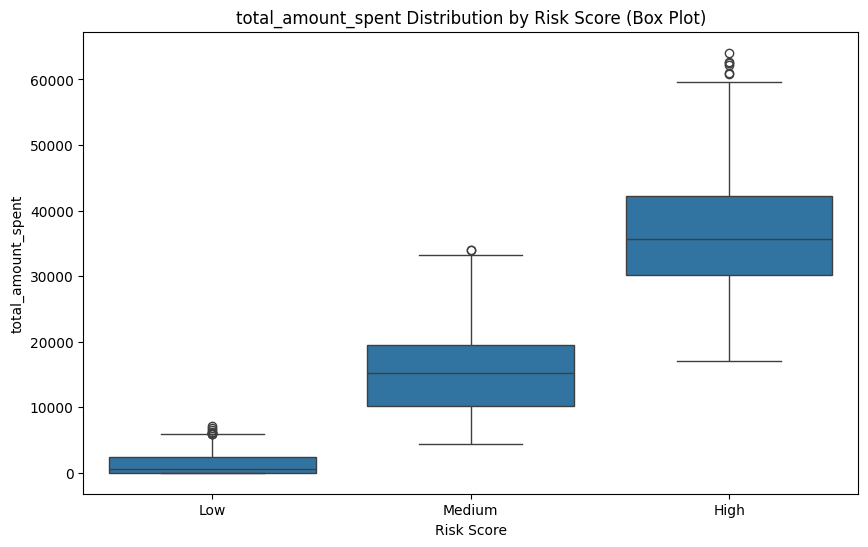

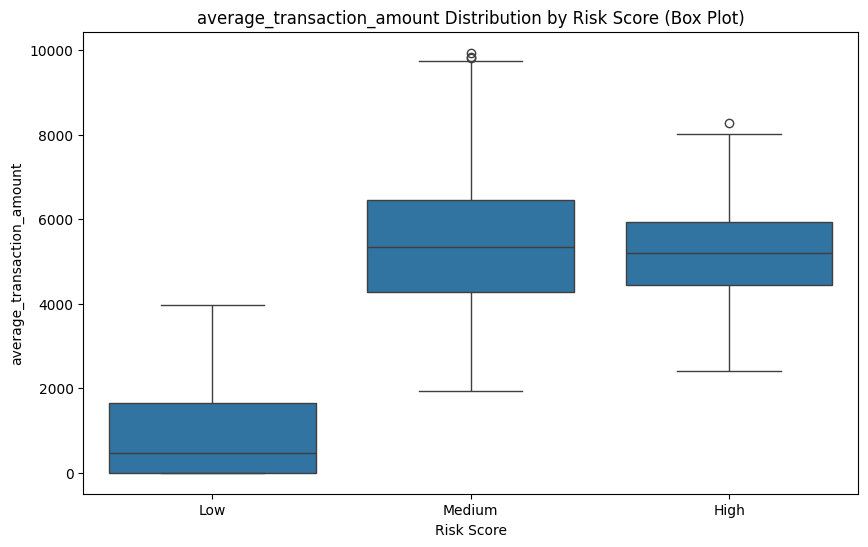

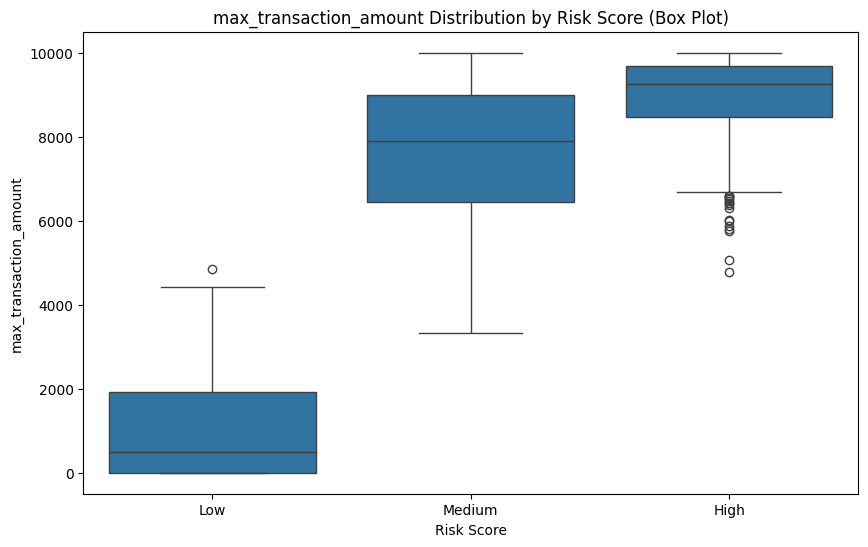

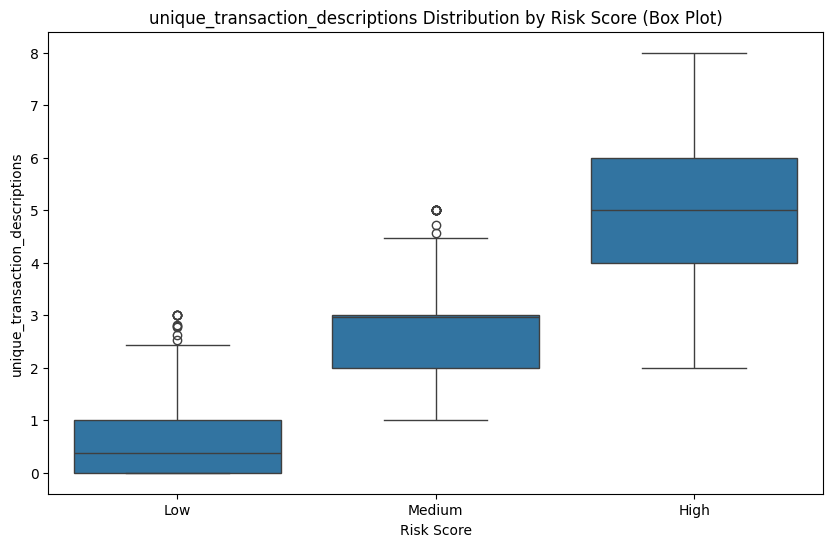

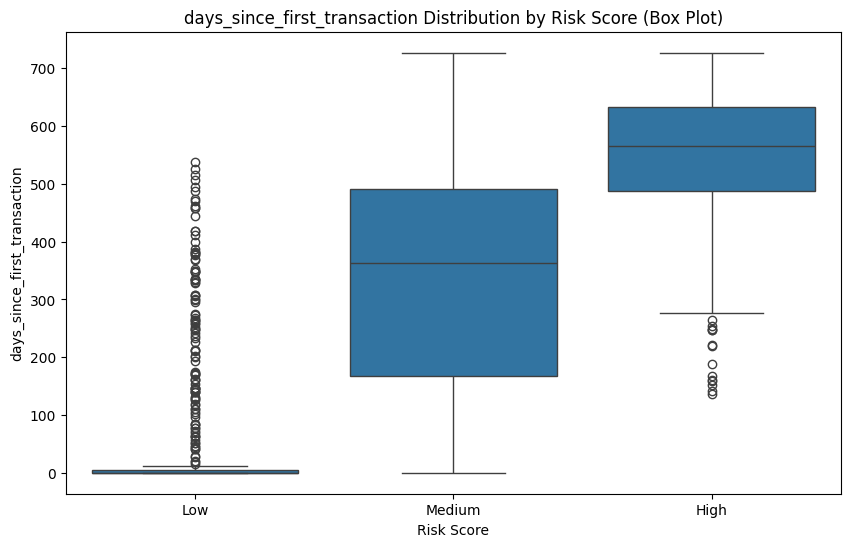

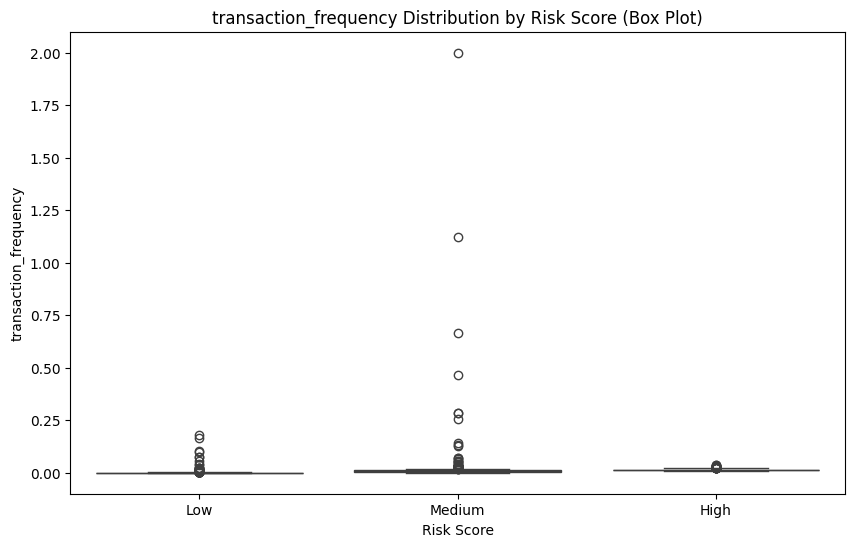

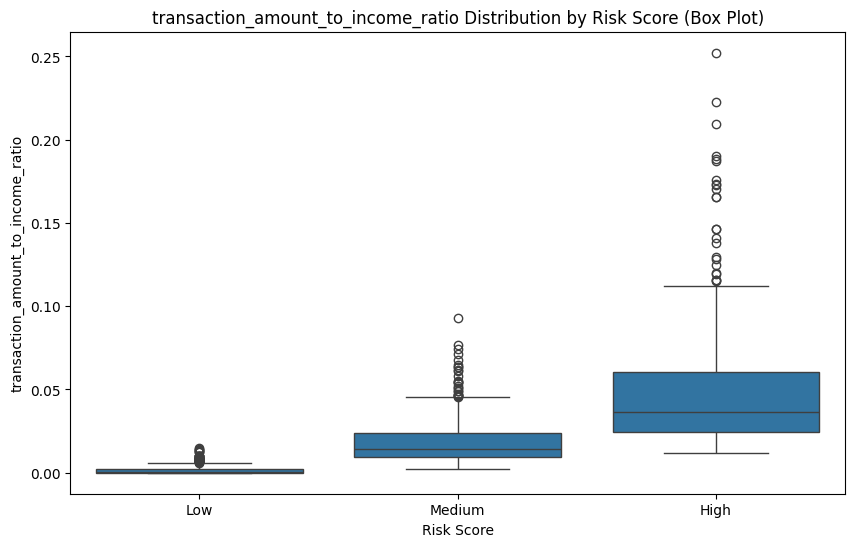

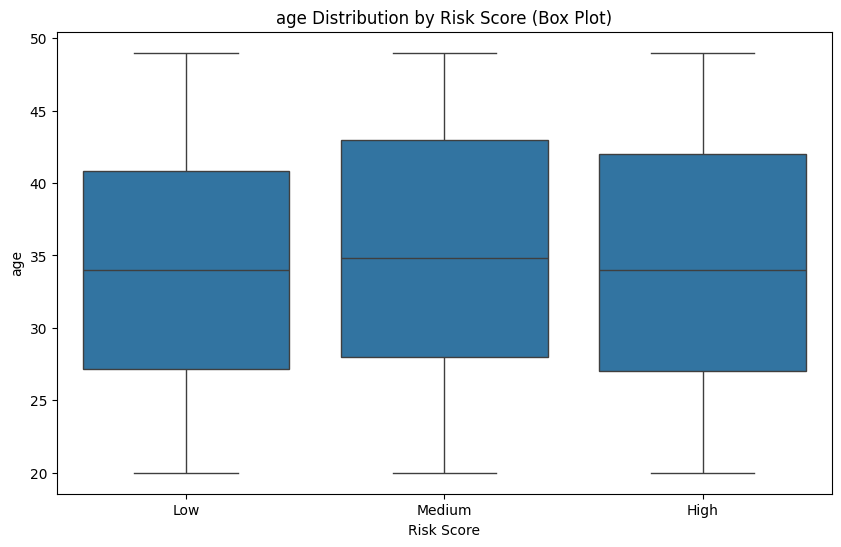

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in selected_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='risk_score', y=feature, data=df)
  plt.title(f'{feature} Distribution by Risk Score (Box Plot)')
  plt.xlabel('Risk Score')
  plt.ylabel(feature)
  plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
  plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.97938144 0.97250859 0.96896552 0.97241379 0.98275862]
Mean CV Accuracy: 0.9752055930797487


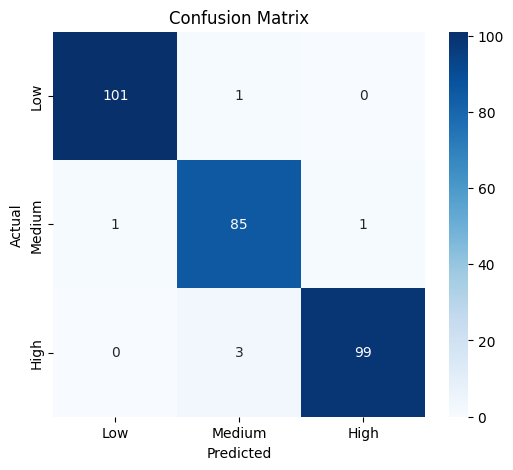

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd

# Create a dictionary with the customer's data
new_customer_data = {
    "annual_income": 750000,  # Example value
    "total_transactions": 15,
    "total_amount_spent": 12000,
    "average_transaction_amount": 800,
    "max_transaction_amount": 2500,
    "unique_transaction_descriptions": 4,
    "days_since_first_transaction": 365,
    "transaction_frequency": 0.041,  # Transactions per day
    "transaction_amount_to_income_ratio": 0.016,
    "age": 35
}

# Create a DataFrame from the dictionary
new_customer_df = pd.DataFrame([new_customer_data])

# Make predictions using the trained model
predicted_risk_score = rf_model.predict(new_customer_df)

print("Predicted Risk Score:", predicted_risk_score[0])

Predicted Risk Score: 1


In [ ]:
import joblib

# Assuming your trained Random Forest model is named 'rf_model'
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)

print(f"Model saved as: {model_filename}")

Model saved as: random_forest_model.pkl
